# Análisis de percepción de afectación por género durante la pandemia COVID19
## Emilio Villa Cueva

In [1]:
#Analisis de datos de covid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lee datos
df = pd.read_csv('datosCOVID/rawData.csv')

In [3]:
df.head()

,Year,Region,Country,Internet_Penetration,Gender,a1_agree,a1_neutral,a1_disagree,a2_opps_other,a3_yes,...,d6_wait,d7_bored,d7_food,d7_health,d7_info,d7_loan,d7_money,d7_none,d7_stuck,d7_work
0,2020,North America,Canada,95 to 100%,Female,93,1,5,7.40,54,...,33,30,30,33,33,19,35,7,37,32
1,2020,North America,Canada,95 to 100%,Male,92,2,5,7.62,59,...,31,31,28,26,29,19,33,6,35,36
2,2020,North America,Canada,95 to 100%,Combined,93,2,5,7.55,56,...,32,31,29,30,31,19,34,6,36,34
3,2020,North America,United States of America,70 to 75%,Female,90,3,7,7.42,50,...,36,32,34,28,42,17,39,7,37,33
4,2020,North America,United States of America,70 to 75%,Male,89,4,8,7.88,64,...,28,27,28,25,40,17,33,8,32,35


In [5]:
#toma variables de interés
intVars = ['a1_agree','c2_clean','c2_cook',
           'c3_agree','c2d_increase','d5_agree',
           'd7_money','d6_school']
#Significado de las variables para las visualizaciones
var_meaning = ['De acuerdo con que hombres y mujeres deben de tener las mismas oportunidades',
               'Se encarga de la limpieza de la casa',
               'Se encarga de cocinar en la casa',
               'Está de acuerdo con que el rol más importante de una mujer es cuidar la casa y su familia',
               'Durante la pandemia aumentó el tiempo que se dedica al hogar',
               'Se ha sentido incómod@ o en riesgo en su propio hogar',
               'Su principal preocupación durante la pandemia es tener dinero sufuiente para subsustir',
              'Se vió imposibilitado de ir a la escuela']

df = df[['Region','Country','Gender']+intVars]
df_m = df.loc[df['Gender'] == 'Male']
df_f = df.loc[df['Gender'] == 'Female']
df.head(20)

,Region,Country,Gender,a1_agree,c2_clean,c2_cook,c3_agree,c2d_increase,d5_agree,d7_money,d6_school
0,North America,Canada,Female,93,87,77,30,45,17,35,33
1,North America,Canada,Male,92,74,65,23,35,16,33,27
2,North America,Canada,Combined,93,81,72,26,40,17,34,30
3,North America,United States of America,Female,90,88,78,37,43,14,39,36
4,North America,United States of America,Male,89,74,61,33,36,13,33,26
5,North America,United States of America,Combined,90,82,72,35,40,14,37,32
6,East Asia & Pacific,Australia,Female,92,86,79,27,40,18,32,31
7,East Asia & Pacific,Australia,Male,90,65,57,27,28,17,31,22
8,East Asia & Pacific,Australia,Combined,91,77,70,27,36,18,31,27
9,East Asia & Pacific,Cambodia,Female,94,54,40,46,54,43,22,59


In [7]:
#Agrupa por regiones
df_reg_m=df_m.groupby(['Region']).mean()
df_reg_f=df_f.groupby(['Region']).mean()
#df_reg_f.to_csv('tmp.csv')#se uso para graficar
df_reg_f


,a1_agree,c2_clean,c2_cook,c3_agree,c2d_increase,d5_agree,d7_money,d6_school
Region,,,,,,,,
East Asia & Pacific,90.416667,66.166667,50.916667,51.166667,42.583333,33.500000,32.500000,36.750000
Europe and Central Asia,91.846154,83.000000,70.794872,35.538462,38.564103,23.102564,35.820513,30.256410
Latin America and Caribbean,91.761905,80.619048,62.571429,35.095238,56.142857,38.714286,54.142857,44.714286
Middle East and North Africa,89.705882,74.000000,58.764706,55.294118,53.882353,43.117647,36.529412,35.470588
North America,91.500000,87.500000,77.500000,33.500000,44.000000,15.500000,37.000000,34.500000
South Asia,89.714286,64.428571,58.714286,62.714286,53.857143,29.714286,28.428571,41.571429
Sub-Saharan Africa,86.440000,67.280000,58.040000,64.920000,49.120000,50.640000,36.120000,51.680000


In [8]:
#toma diferencias entre genero para distintos valores
aux =[]
aux2 =[]
for x in intVars:
    mTmp = np.asarray(df_reg_m[x])
    fTmp = np.asarray(df_reg_f[x])
    dif = fTmp-mTmp
    dif2 = (fTmp+mTmp)*0.5
    aux.append(dif)
    aux2.append(dif2)
regs= list(df_reg_m.index)

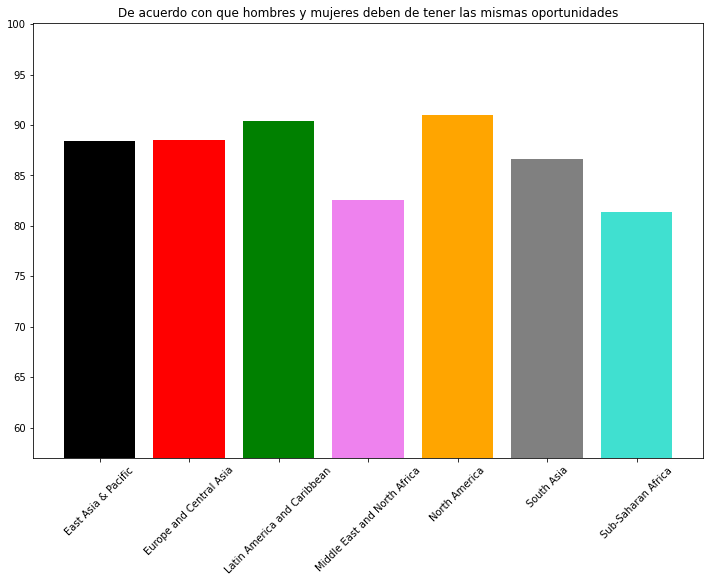

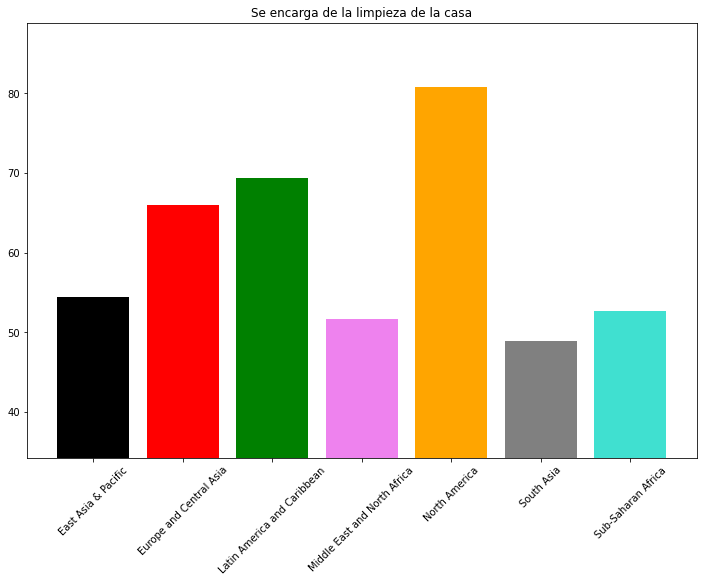

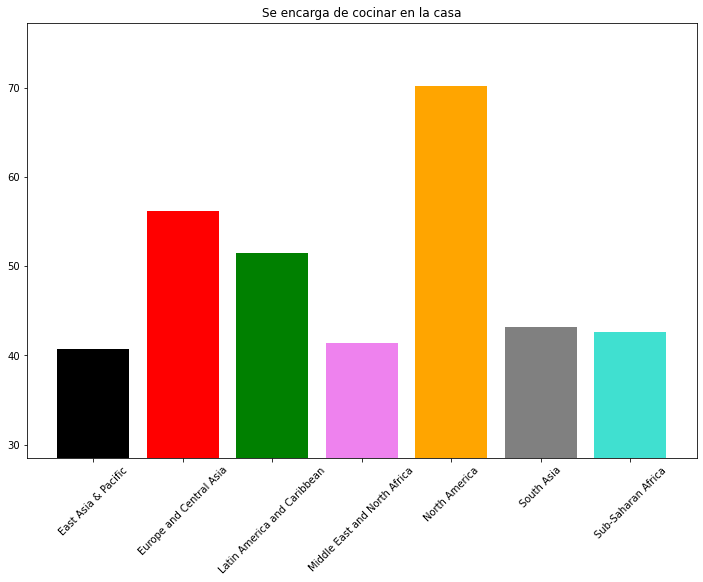

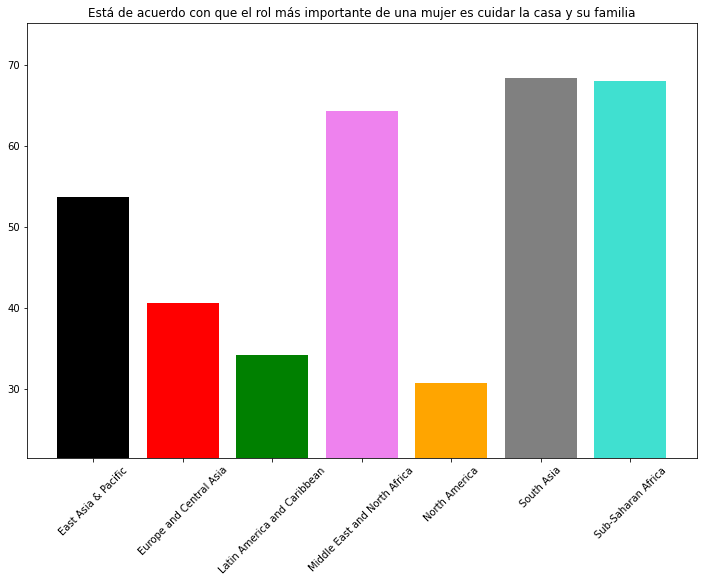

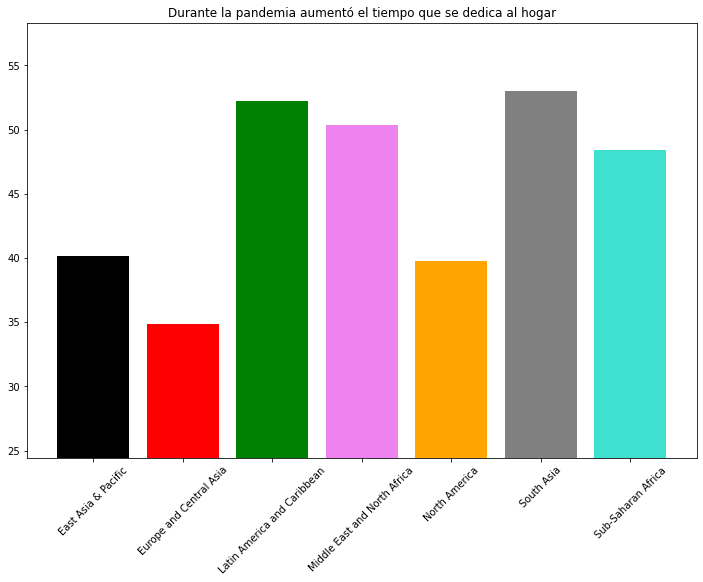

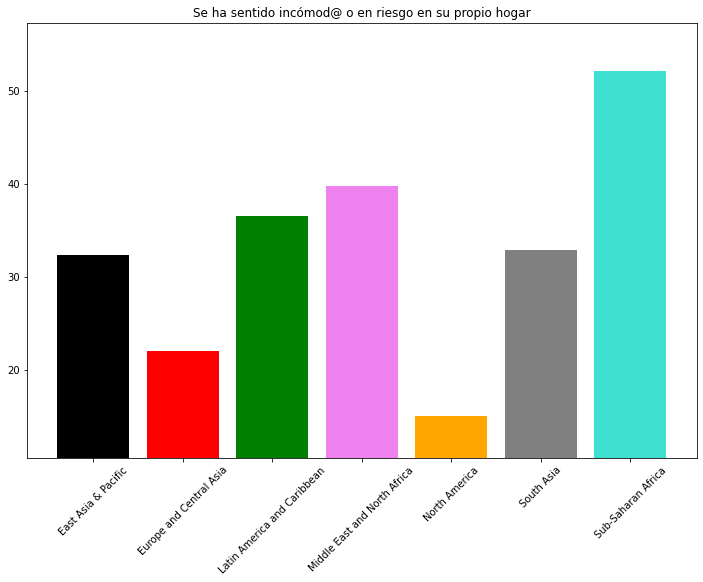

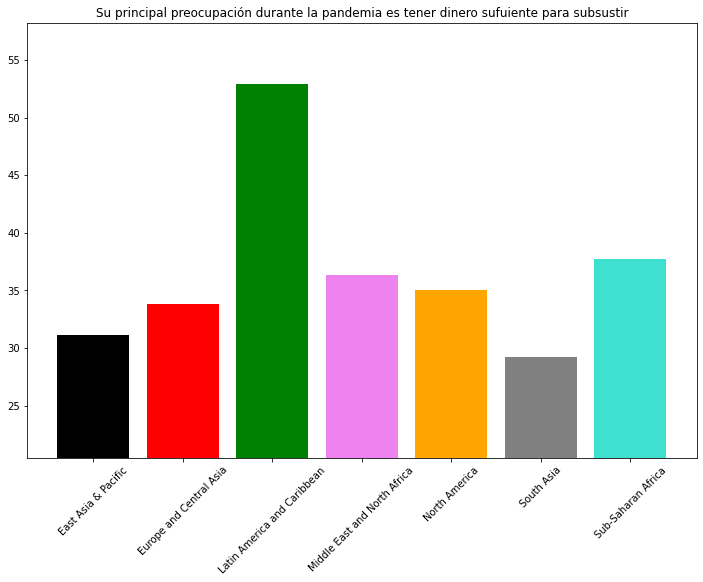

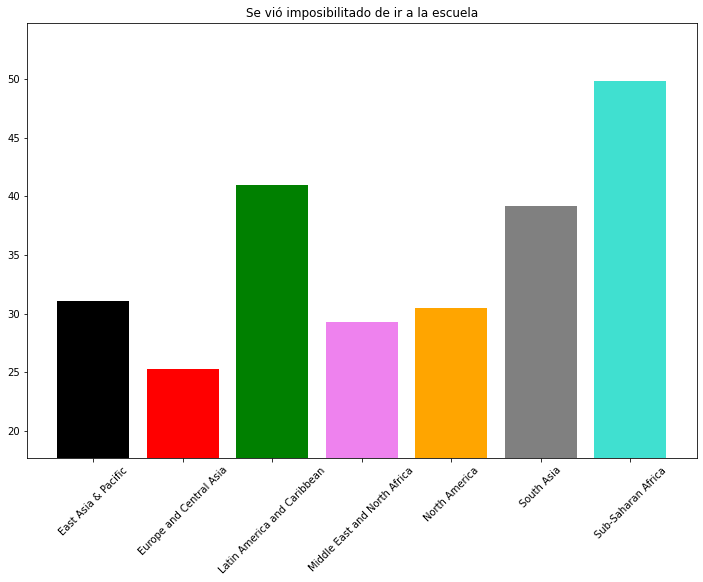

In [10]:
#Grafica primer parte
for i in range(len(intVars)):
    #plt.clf()
    plt.figure(figsize=(12,8))
    degrees = 45
    plt.xticks(rotation=degrees)
    plt.bar(regs,aux2[i],
            color=['black', 'red', 'green', 'violet', 'orange','gray','turquoise'])
    #plt.ylim(-1.2*abs(max(aux[i])),1.2*abs(max(aux[i])))
    plt.ylim(0.7*min(aux2[i]),1.1*max(aux2[i]))
    plt.title(var_meaning[i])
    #plt.plot([-1,7],[0,0],color='blue',
    #       linestyle='--',linewidth=1)
    #plt.text(0.0,1.1*mx,'RESPUESTAS POSITIVAS MUJERES')
    #plt.text(0.0,-1.1*mx,'RESPUESTAS POSITIVAS HOMBRES')

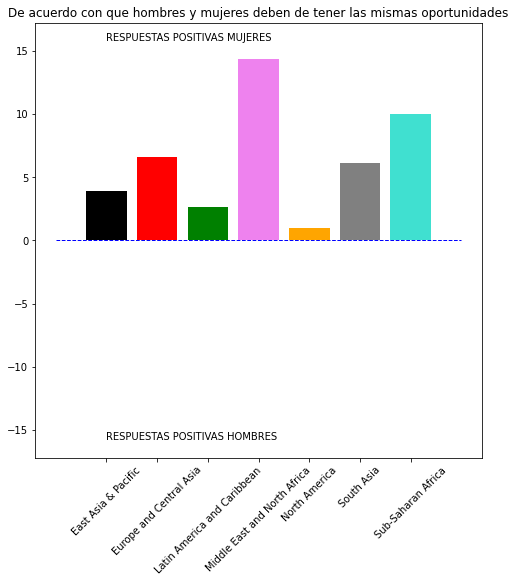

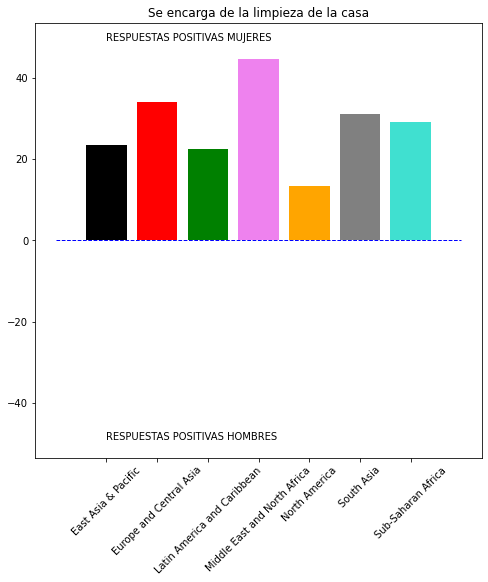

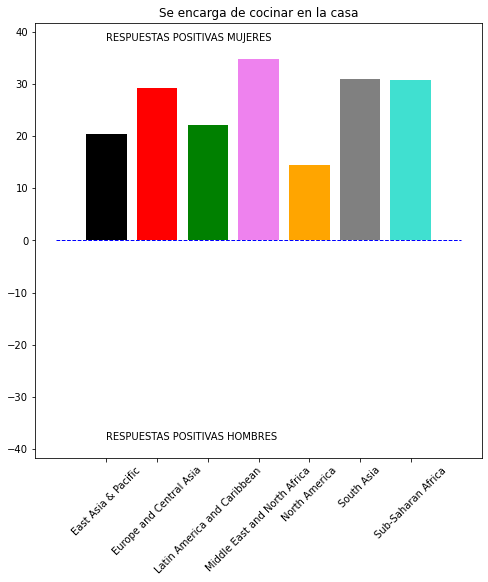

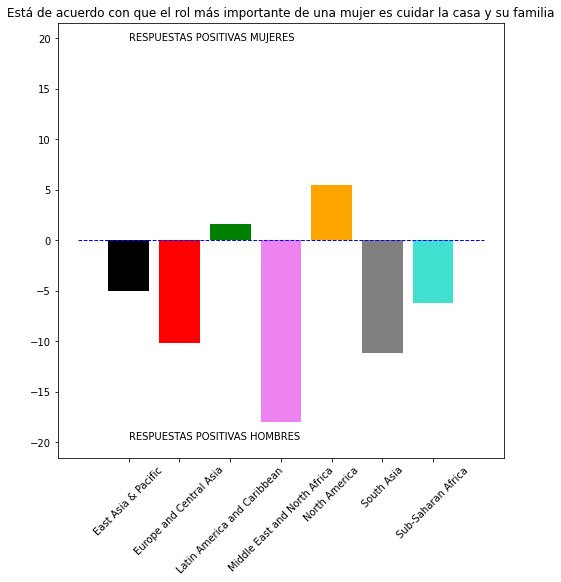

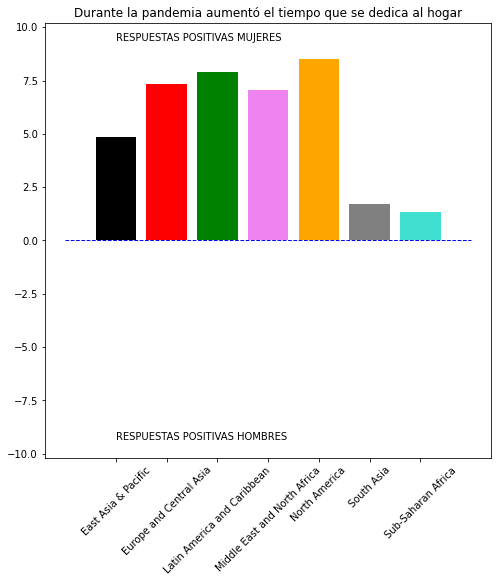

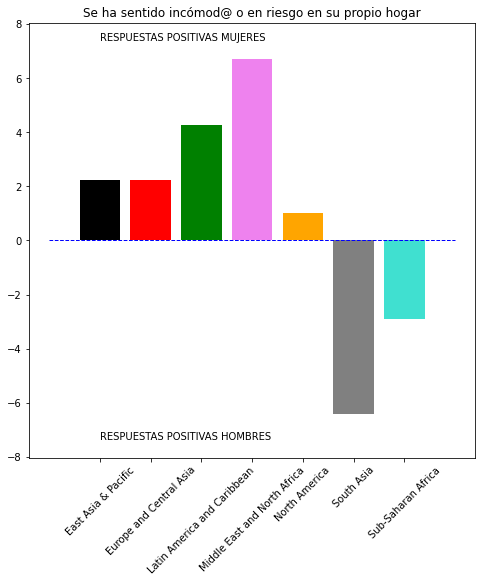

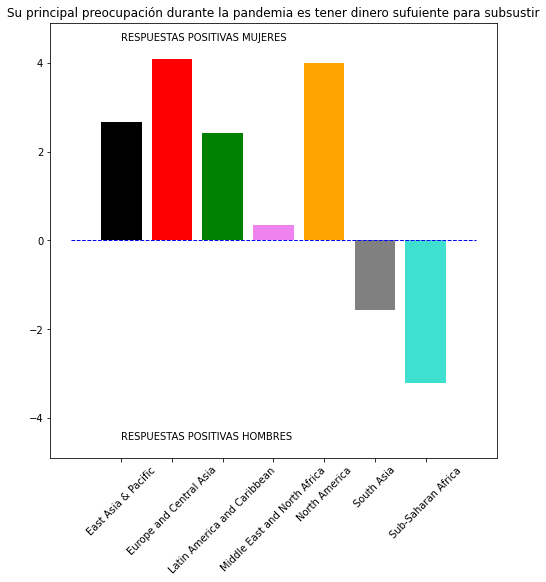

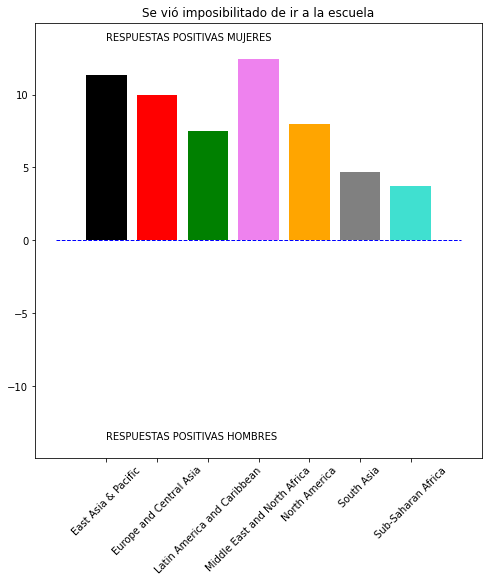

In [11]:
#Grafica segunda parte
for i in range(len(intVars)):
    #plt.clf()
    plt.figure(figsize=(8,8))
    degrees = 45
    plt.xticks(rotation=degrees)
    plt.bar(regs,aux[i],
            color=['black', 'red', 'green', 'violet', 'orange','gray','turquoise'])
    #plt.ylim(-1.2*abs(max(aux[i])),1.2*abs(max(aux[i])))
    mx =max(abs(min(aux[i])),max(aux[i]))
    plt.ylim(-1.2*mx,1.2*mx)
    plt.title(var_meaning[i])
    plt.plot([-1,7],[0,0],color='blue',
           linestyle='--',linewidth=1)
    plt.text(0.0,1.1*mx,'RESPUESTAS POSITIVAS MUJERES')
    plt.text(0.0,-1.1*mx,'RESPUESTAS POSITIVAS HOMBRES')